#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [626]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from scipy import stats

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [627]:
# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)



Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer Question1: **I used the feature_selection class in sklearn to select the 3 most significant features. If we run the code below, then our 3 selected features are:
* CRIM: per capita crime rate by town
* RM:  average number of rooms per dwelling
* LSTAT:  % lower status of the population 


In [628]:
from sklearn.feature_selection import SelectKBest
#setting k=13 will run the model as if there is no feature selection
housing_features_new = SelectKBest(k=3).fit_transform(housing_features, housing_prices)
CLIENT_FEATURES_NEW=[]
for i in range(housing_features.shape[1]):
    for j in range(housing_features_new.shape[1]):
        if(np.array_equal(housing_features[:,i],housing_features_new[:,j])):
            print('feature '+str(i),city_data.feature_names[i],'value in set CLIENT_FEATURES: '+ str(CLIENT_FEATURES[0][i]))
            CLIENT_FEATURES_NEW.append(CLIENT_FEATURES[0][i])
            
CLIENT_FEATURES_NEW=[CLIENT_FEATURES_NEW]

('feature 0', 'CRIM', 'value in set CLIENT_FEATURES: 11.95')
('feature 5', 'RM', 'value in set CLIENT_FEATURES: 5.609')
('feature 12', 'LSTAT', 'value in set CLIENT_FEATURES: 12.13')


##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [629]:
print "Values of CLIENT_FEATURES :",CLIENT_FEATURES
print "Values of 3 most significant CLIENT_FEATURES :",CLIENT_FEATURES_NEW

Values of CLIENT_FEATURES : [[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]
Values of 3 most significant CLIENT_FEATURES : [[11.95, 5.609, 12.13]]


**Answer Question2: **
* CRIM has the value 11.95
* RM has the value 5.609
* LSTAT has the value 12.13

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [630]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    #this piece of code has been altered to use the selected features instead of the entire data set
    #I replaced housing_features_new instead of housing_features
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features_new, housing_prices)
    print "Successfully shuffled and split the data!"    
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


##Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer Question3**: In order to make a correct assessment of the models accuracy. You train the model using the training set and as a second step you use the test set (is data set that the model never has seen before) to see how the model performs on new (future data).
What we need is an independent set of data to verify that the model can generalize well rather than just to the training examples.
We separate training and testing sets so we can get a better idea whether the model can generalize to unseen data rather than fit to the data just seen.

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [631]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer Question4: **
In the Boston housing case we are trying to predict house prices using a regression model. Another type of model is classification, where we try to predict to which category an instance belongs. A regression makes predictions on continuous data and classification on discrete data.
Accuracy, precision, recall and F1 score are performance metrics for a classification model and as such not suited for the Boston housing case. They all measure how succesfully the model was in labeling the instances.
This leaves us with 2 possible metrics for our regression problem: MSE and MAE. I would use MSE because it gives more weight to larger errors and these are the ones we want to avoid.

##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [632]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=regressor,param_grid=parameters,scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model on entire dataset
try:
    #this piece of code has been altered to use the selected features instead of the entire data set
    #I replaced housing_features_new instead of housing_features
    reg = fit_model(housing_features_new, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer Question5: **
The grid search algorithm otpimizes parameters of an algorithm that are not learnt during the training of the model. For example in the boston housing case we are using a decision tree algorithm for our regression. When applying this decision tree, the user needs to decide about the debt of the tree. Once the debt has been decided, the model can be trained for the tree with this specific debt. In general a tree with greater debt will result in a more accurate model, but will also have a higher risk of overfitting.
The grid search algorithm allows you to define a value range for some model parameters and will calculate how the values of a scoring function changes for different parameter values in this range.

##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer Question6: ** Cross validation is a technique that allows you to better use the available data to train a model. The training data is divided into k folds and the model is trained in k sessions. In each session you select k-1 folds and the remaining kth fold is used for testing. Finally, the performance metric of each of the k sessions is averaged.  
    By combining cross-validation and grid search, parameter tuning of the model can be automated in a great extend. It provides a way of systematically working through different combinations of parameters and cross validating them to determine which combination gives the best results. Cross validation is using all the available data for training and testing by dividing the data in k-folds. In this way you can test a specific combination of model parameters several times and average the results over the different runs. This provides a much more reliable picture for a specific parameter combination than just 1 training testing run.

#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [633]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [634]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\Jeroen\Anaconda\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Jeroen\Anaconda\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


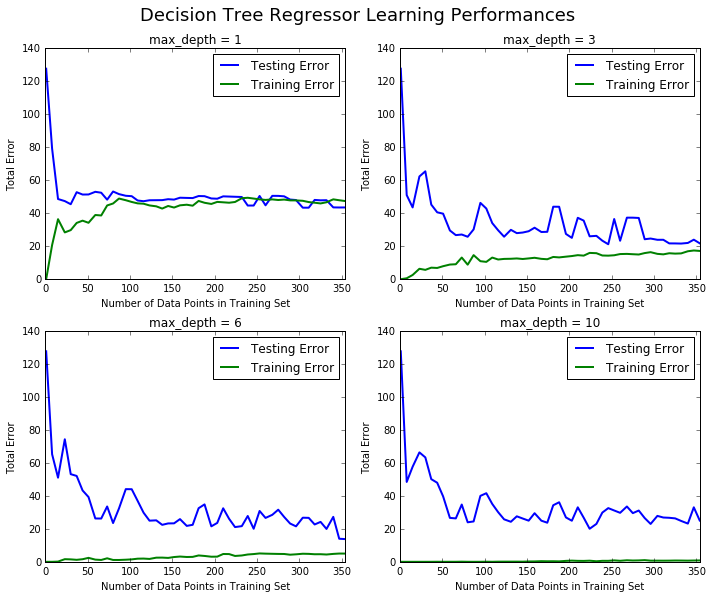

In [635]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer Question7: **
max depth=3: as the size of the training set increases, the training error increases and the testing error decreases.

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer Question8: **
High bias: when the training and testing errors converge and are quite high. This is the case for the model with max depth 1.
High variance: when we have a large gap between the training and testing error. This is the case for the model with max depth 10.

Creating a model complexity graph. . . 


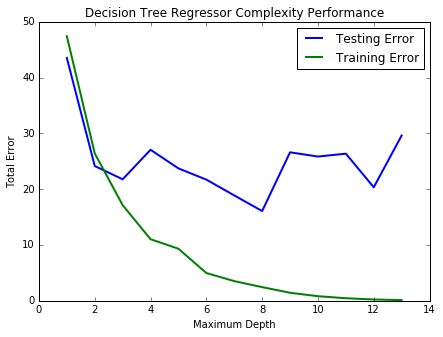

In [636]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer Question9: ** As the max depth increases, both the testing error and training error decrease. But the testing error is stabilizing when depth is more than 5. For me the optimal max depth is 5 because this is the point where the training error curve and the testing error curve start to diverge and the testing error is not declining any further. Adding further complexity to the model is not improving the performance of the model (stable testing error). The further decrease of the training error indicates that the model is overfitting and loosing its ability to generalise.


#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

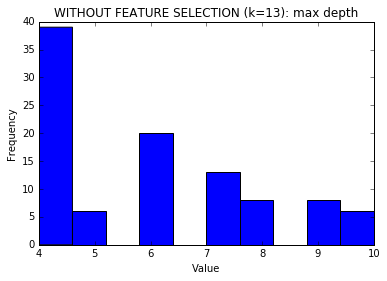

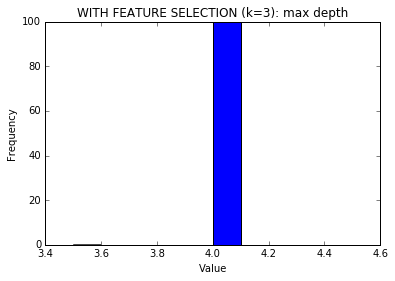

In [637]:
#code without feature selection
BestParam=[]
for i in range(100):
    reg = fit_model(housing_features, housing_prices)
    #print "Final model optimal parameters:", reg.best_params_.get('max_depth')
    BestParam.append(reg.best_params_.get('max_depth'))

pl.hist(BestParam)
pl.title("WITHOUT FEATURE SELECTION (k=13): max depth")
pl.xlabel("Value")
pl.ylabel("Frequency")
pl.show()

#code with feature selection
BestParam=[]
for i in range(100):
    reg = fit_model(housing_features_new, housing_prices)
    #print "Final model optimal parameters:", reg.best_params_.get('max_depth')
    BestParam.append(reg.best_params_.get('max_depth'))

pl.hist(BestParam)
pl.title("WITH FEATURE SELECTION (k=3): max depth")
pl.xlabel("Value")
pl.ylabel("Frequency")
pl.show()



**Answer Question10: ** The code has been altered so that the model can be run with feature selection (k=3) or without feature selection (k=13).
* WITHOUT FEATURE SELECTION (k=13): In my previous answer I said between 3 and 5 would be the optimal max debt. I ran the fit_model function 100 times and the histogram in this case shows that about half of these runs indicated 4 to be the optimal debt. This seems to confirm my intuition. For the other half of the runs the outcome was less consistent. About 20% of the runs gave an optimal debt of 7 or more. This seems to indicate that there is some work needed to make the fit_model more consistent.
* WITH FEATURE SELECTION (k=3): In this case all 100 runs indicate that 4 is the optimal maximum debt. It shows that reducing the number of features to the best 3 features (CRIM, RM, LSTAT) improves the performance of the grid search algorithm

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

The code below visualizes the housing prices and predicted housing prices. Code was taken from: https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/

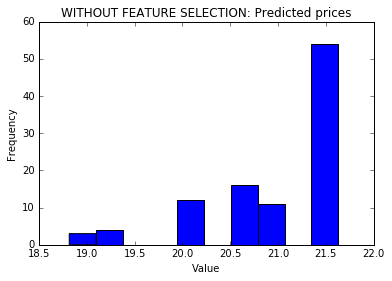

Mean predicted house price: 21.045
Median predicted house price: 21.6297435897
The minimum predicted house price:  18.8166666667
The maximum predicted house price:  21.6297435897


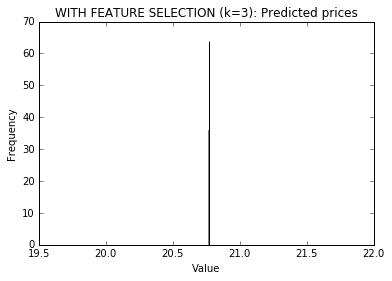

Mean predicted house price: 20.770
Median predicted house price: 20.7699115044
The minimum predicted house price:  20.7699115044
The maximum predicted house price:  20.7699115044


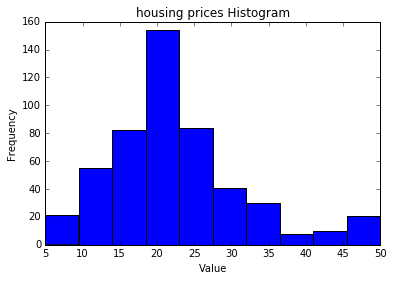

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


In [638]:
#code below is not using feature selection (k=13)
PredictedPrices=[]
for i in range(100):
    reg = fit_model(housing_features, housing_prices)
    sale_price = reg.predict(CLIENT_FEATURES)    
    PredictedPrices.append(sale_price[0])
pl.hist(PredictedPrices)
pl.title("WITHOUT FEATURE SELECTION: Predicted prices")
pl.xlabel("Value")
pl.ylabel("Frequency")
pl.show()

# Mean predicted value of the dataset
mean_prediction = np.asarray(PredictedPrices).mean()

# Median house value of the dataset
median_prediction = np.median(np.asarray(PredictedPrices))

print "Mean predicted house price: {0:.3f}".format(mean_prediction)
print "Median predicted house price:", median_prediction
print "The minimum predicted house price: ", np.asarray(PredictedPrices).min()
print "The maximum predicted house price: ", np.asarray(PredictedPrices).max()

#################################################################################################
#code below uses feature selection
PredictedPrices=[]
for i in range(100):
    reg = fit_model(housing_features_new, housing_prices)
    sale_price = reg.predict(CLIENT_FEATURES_NEW)
    PredictedPrices.append(sale_price[0])
pl.hist(PredictedPrices)
pl.title("WITH FEATURE SELECTION (k=3): Predicted prices")
pl.xlabel("Value")
pl.ylabel("Frequency")
pl.show()

# Mean predicted value of the dataset
mean_prediction = np.asarray(PredictedPrices).mean()

# Median house value of the dataset
median_prediction = np.median(np.asarray(PredictedPrices))

print "Mean predicted house price: {0:.3f}".format(mean_prediction)
print "Median predicted house price:", median_prediction
print "The minimum predicted house price: ", np.asarray(PredictedPrices).min()
print "The maximum predicted house price: ", np.asarray(PredictedPrices).max()

pl.hist(housing_prices)
pl.title("housing prices Histogram")
pl.xlabel("Value")
pl.ylabel("Frequency")
pl.show()

print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

**Answer Question 11: **
The histograms above show the distributions of predicted prices after 100 runs for the model with and without feature selection.
* WITHOUT FEATURE SELECTION: After 100 runs the predicted house prices ranges between 18.82 and 21.63. The mean predicted price is 20.9 and the median predicted house price is 20.97.
* WITH FEATURE SELECTION (k=3): If we use the 3 most suitable features instead of all 13 features, then we see that the predicted price is much more consistent. All 100 model runs predict the same price of 20.77.

When we look at the third histogram (distribution of prices in the data set), then we can see that mode, median and mean are all in the 19-24 bin. Our predicted house price lies also in this bin which tells us that we are selling here a "typical average house" for this area.


##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer Question 12: **
In general the price prediction has been based on applying best practices:
* carefully chosing a good performance metric
* shuffling and splitting data in a test and training set
* Using a grid search algorithm to optimise the max depth parameter in the DecisionTreeRegression model
* Applying cross validation

In the original code that was provided, there was 1 thing not implemented in the grid search algorithm and the price forecasting model. In the beginning of the excercise we needed to look for the 3 most significant features in the data set. But all the remaining code was using all the features instead of the 3 most significant features. 

In question 10 and question 11 I proved the importance of reducing the number of features by running the code with and without feature selection.

So I would improve the initial code by applying feature selection in the model. This improved code would give me sufficient confidence to use it on a real live case.